In [2]:
%load_ext autoreload
%autoreload 2

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.forDarkTheme()

In [3]:
bn=gum.BayesNet()

A=bn.add(gum.LabelizedVariable("A","A",["0","1"]))
B=bn.add(gum.LabelizedVariable("B","B",["0","1"]))

bn.addArc(A,B)

bn

(gum::BayesNet<double>@0x393a7c0) BN{nodes: 2, arcs: 1, domainSize: 4, parameters: 6, compression ratio: -50% }

In [4]:
pA = bn.cpt(A).fillWith([0.4,0.6])
pA

(gum::Potential<double>@0x2fb9de0) <A:0> :: 0.4 /<A:1> :: 0.6

In [5]:
pB_A = bn.cpt(B).fillWith([0.2,0.8,0.6,0.4])
pB_A

(gum::Potential<double>@0x38cc800) <B:0|A:0> :: 0.2 /<B:1|A:0> :: 0.8 /<B:0|A:1> :: 0.6 /<B:1|A:1> :: 0.4

In [6]:
pAB = pA*pB_A
pAB.reorganize(['B','A'])

(gum::Potential<double>@0x393fa00) <B:0|A:0> :: 0.08 /<B:1|A:0> :: 0.32 /<B:0|A:1> :: 0.36 /<B:1|A:1> :: 0.24

In [7]:
pB = pAB.margSumIn('B')
pB

(gum::Potential<double>@0x2cc4570) <B:0> :: 0.44 /<B:1> :: 0.56

In [8]:
pAB.entropy()

1.8422921890824147

In [9]:
learner=gum.BNLearner("D.csv")
learn1=learner.learnParameters(bn.dag())

gnb.sideBySide(*[learn1.cpt(i)for i in learn1.nodes()])

In [13]:
import numpy as np

In [15]:
np.log2((0.4**2)*(0.6**3)*(0.5)*(0.5)*((2/3)**2)*((1/3)**1))

-9.609640474436812

In [10]:
import pyAgrum.lib.bn2scores as bnsc
print("Scores for modèle 1")
print(bnsc.computeScores(learn1,"D.csv"))

Scores for modèle 1
(100.0, {'mdl': -107.93156856932417, 'likelihood': -9.60964047443681, 'bic': -16.575424759098897, 'aicc': -33.21928094887362, 'aic': -12.60964047443681})


In [1]:
bn1=gum.BayesNet()

A=bn1.add(gum.LabelizedVariable("A","A",["0","1"]))
B=bn1.add(gum.LabelizedVariable("B","B",["0","1"]))

bn1

NameError: name 'gum' is not defined

In [199]:
learner=gum.BNLearner("D.csv")
learn1=learner.learnParameters(bn1.dag())

gnb.sideBySide(*[learn1.cpt(i)for i in learn1.nodes()])

In [200]:
import pyAgrum.lib.bn2scores as bnsc
print("Scores for modèle 1")
print(bnsc.computeScores(learn1,"D.csv"))

Scores for modèle 1
(100.0, {'bic': -14.353362134321412, 'aicc': -26.419011889093376, 'likelihood': -9.709505944546688, 'mdl': -73.70950594454669, 'aic': -11.709505944546688})


In [202]:
bn2=gum.BayesNet()

A=bn2.add(gum.LabelizedVariable("A","A",["0","1"]))
B=bn2.add(gum.LabelizedVariable("B","B",["0","1"]))

bn2.addArc(A,B)

bn2

(gum::BayesNet<double>@0x3ee8190) BN{nodes: 2, arcs: 1, domainSize: 4, parameters: 6, compression ratio: -50% }

In [203]:
learner=gum.BNLearner("D.csv")
learn1=learner.learnParameters(bn2.dag())

gnb.sideBySide(*[learn1.cpt(i)for i in learn1.nodes()])

In [204]:
import pyAgrum.lib.bn2scores as bnsc
print("Scores for modèle 1")
print(bnsc.computeScores(learn1,"D.csv"))

Scores for modèle 1
(100.0, {'bic': -16.575424759098897, 'aicc': -33.21928094887362, 'likelihood': -9.60964047443681, 'mdl': -107.93156856932417, 'aic': -12.60964047443681})


In [162]:
bn = gum.BayesNet()
A=bn.add(gum.LabelizedVariable("A","A",["a","a_"]))
B=bn.add(gum.LabelizedVariable("B","B",["b","b_"]))
C=bn.add(gum.LabelizedVariable("C","C",["c","c_"]))


bn.addArc(A,B)
bn.addArc(B,C)

pA1 = bn.cpt(A).fillWith([0.7,0.3])
pB_A = bn.cpt(B).fillWith([0.6,0.4,0.8,0.2])
pC_B = bn.cpt(C).fillWith([0.5,0.5,0.1,0.9])

bn

(gum::BayesNet<double>@0x41f8da0) BN{nodes: 3, arcs: 2, domainSize: 8, parameters: 10, compression ratio: -24% }

In [163]:
gnb.sideBySide(pA1,pB_A,pC_B)

In [164]:
pBN1 = pA1*pB_A*pC_B
pBN1

(gum::Potential<double>@0x4b3e400) <B:b|C:c|A:a> :: 0.21 /<B:b_|C:c|A:a> :: 0.028 /<B:b|C:c_|A:a> :: 0.21 /<B:b_|C:c_|A:a> :: 0.252 /<B:b|C:c|A:a_> :: 0.12 /<B:b_|C:c|A:a_> :: 0.006 /<B:b|C:c_|A:a_> :: 0.12 /<B:b_|C:c_|A:a_> :: 0.054

In [165]:
bn = gum.BayesNet()
A=bn.add(gum.LabelizedVariable("A","A",["a","a_"]))
B=bn.add(gum.LabelizedVariable("B","B",["b","b_"]))
C=bn.add(gum.LabelizedVariable("C","C",["c","c_"]))


bn.addArc(A,B)
bn.addArc(C,B)

pA2 = bn.cpt(A).fillWith([0.3,0.7])
pC = bn.cpt(C).fillWith([0.7,0.3])
pB_AC = bn.cpt(B).fillWith([0.7,0.3,0.6,0.4,0.9,0.1,0.7,0.3])

bn

(gum::BayesNet<double>@0x415d720) BN{nodes: 3, arcs: 2, domainSize: 8, parameters: 12, compression ratio: -50% }

In [166]:
gnb.sideBySide(pA2,pC,pB_AC)

In [167]:
pBN2 = pA2*pC*pB_AC
pBN2

(gum::Potential<double>@0x42ba4f0) <C:c|A:a|B:b> :: 0.147 /<C:c_|A:a|B:b> :: 0.081 /<C:c|A:a_|B:b> :: 0.294 /<C:c_|A:a_|B:b> :: 0.147 /<C:c|A:a|B:b_> :: 0.063 /<C:c_|A:a|B:b_> :: 0.009 /<C:c|A:a_|B:b_> :: 0.196 /<C:c_|A:a_|B:b_> :: 0.063

In [168]:
pBN2 = pBN2.reorganize(['A','B','C'])
pBN2

(gum::Potential<double>@0x3a77990) <A:a|B:b|C:c> :: 0.147 /<A:a_|B:b|C:c> :: 0.294 /<A:a|B:b_|C:c> :: 0.063 /<A:a_|B:b_|C:c> :: 0.196 /<A:a|B:b|C:c_> :: 0.081 /<A:a_|B:b|C:c_> :: 0.147 /<A:a|B:b_|C:c_> :: 0.009 /<A:a_|B:b_|C:c_> :: 0.063

In [169]:
pBN1 = pBN1.reorganize(['A','B','C'])
pBN1

(gum::Potential<double>@0x4ae9890) <A:a|B:b|C:c> :: 0.21 /<A:a_|B:b|C:c> :: 0.12 /<A:a|B:b_|C:c> :: 0.028 /<A:a_|B:b_|C:c> :: 0.006 /<A:a|B:b|C:c_> :: 0.21 /<A:a_|B:b|C:c_> :: 0.12 /<A:a|B:b_|C:c_> :: 0.252 /<A:a_|B:b_|C:c_> :: 0.054

In [170]:
pBN1.KL(pBN2)

InvalidArgument: [pyAgrum] Invalid argument: A variable in the argument does not belong to the potential.

In [134]:
bn = gum.BayesNet()
A=bn.add(gum.LabelizedVariable("A","A",["a_","a"]))
B=bn.add(gum.LabelizedVariable("B","B",["b","b_"]))
C=bn.add(gum.LabelizedVariable("C","C",["c_","c"]))


bn.addArc(A,B)
bn.addArc(C,B)

pA = bn.cpt(A).fillWith([0.3,0.7])
pC = bn.cpt(C).fillWith([0.7,0.3])
pB_AC = bn.cpt(B).fillWith([0.7,0.3,0.6,0.4,0.9,0.1,0.7,0.3])

pBN1.KL(pA*pC*pB_AC)

InvalidArgument: [pyAgrum] Invalid argument: A variable in the argument does not belong to the potential.

In [2]:
bn = gum.BayesNet()
A=bn.add(gum.LabelizedVariable("A","A",["a","a_"]))
B=bn.add(gum.LabelizedVariable("B","B",["b","b_"]))
C=bn.add(gum.LabelizedVariable("C","C",["c","c_"]))
D=bn.add(gum.LabelizedVariable("D","D",["d","d_"]))

bn.addArc(A,B)
bn.addArc(A,C)
bn.addArc(B,D)
bn.addArc(C,D)

bn

(gum::BayesNet<double>@0x3957690) BN{nodes: 4, arcs: 4, domainSize: 16, parameters: 18, compression ratio: -12% }

In [3]:
bn.cpt(A).fillWith([0.5,0.5])

(gum::Potential<double>@0x2ff15c0) <A:a> :: 0.5 /<A:a_> :: 0.5

In [4]:
bn.cpt(B).fillWith([0.1,0.9,0.5,0.5])

(gum::Potential<double>@0x3957f90) <B:b|A:a> :: 0.1 /<B:b_|A:a> :: 0.9 /<B:b|A:a_> :: 0.5 /<B:b_|A:a_> :: 0.5

In [5]:
bn.cpt(C).fillWith([0.8,0.2,0.2,0.8])

(gum::Potential<double>@0x38f6910) <C:c|A:a> :: 0.8 /<C:c_|A:a> :: 0.2 /<C:c|A:a_> :: 0.2 /<C:c_|A:a_> :: 0.8

In [6]:
bn.cpt(D).fillWith([0.99,0.01,0.9,0.1,0.9,0.1,0.01,0.99])

(gum::Potential<double>@0x38f1640) <D:d|B:b|C:c> :: 0.99 /<D:d_|B:b|C:c> :: 0.01 /<D:d|B:b_|C:c> :: 0.9 /<D:d_|B:b_|C:c> :: 0.1 /<D:d|B:b|C:c_> :: 0.9 /<D:d_|B:b|C:c_> :: 0.1 /<D:d|B:b_|C:c_> :: 0.01 /<D:d_|B:b_|C:c_> :: 0.99

In [11]:
gs = gum.GibbsSampling(bn)
gs.posterior("A")

(gum::Potential<double>@0x3a82ad0) <A:a> :: 0.446667 /<A:a_> :: 0.553333

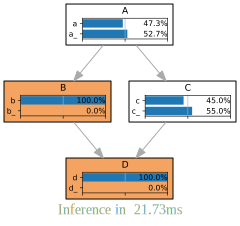

In [15]:
gnb.showInference(bn,engine=gum.GibbsSampling(bn),evs={"B":"b","D":"d"})

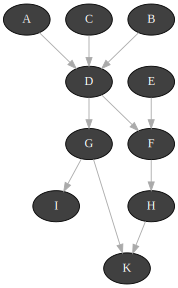

In [25]:
bn=gum.fastBN("A->D<-C;B->D;D->G;D->F;G->I;G->K;F->H;H->K;E->F")
gnb.showBN(bn)

In [3]:
variables = []
for i in range(10):
    print(i,bn.variable(i))

0 A[0-1]
1 D[0-1]
2 C[0-1]
3 B[0-1]
4 G[0-1]
5 F[0-1]
6 I[0-1]
7 K[0-1]
8 H[0-1]
9 E[0-1]


In [20]:
jtg=gum.JunctionTreeGenerator()
jt=jtg.junctionTree(bn)
jt

<pyAgrum.pyAgrum.CliqueGraph; proxy of <Swig Object of type 'gum::CliqueGraph *' at 0x7f057d71db70> >

In [16]:
eo = jtg.eliminationOrder(bn,[[0,3,6,2,4,7,9,1,5,8]])
l = "  ".join([str(bn.variable(i))[0] for i in eo])
print(eo)
print(l)

[6, 9, 7, 3, 0, 2, 1, 8, 4, 5]
I  E  K  B  A  C  D  H  G  F


In [7]:
idi=gum.InfluenceDiagram()
dag=bn.dag()

In [8]:
mg=bn.moralGraph()
mg

(gum::UndiGraph@0x269d6d0) {0,1,2,3,4,5,6,7,8,9} , {0--1,1--3,7--8,1--4,4--6,5--8,0--2,1--5,4--7,5--9,0--3,2--3,1--9,1--2,4--8}

In [35]:
variables = []
for i in range(10):
    print(i,bn.variable(i))

0 A[0-1]
1 D[0-1]
2 C[0-1]
3 B[0-1]
4 G[0-1]
5 F[0-1]
6 I[0-1]
7 K[0-1]
8 H[0-1]
9 E[0-1]


In [6]:
bn=gum.fastBN("A[3]->S[7]<-B[3]->M[3]<-A;M->P")
bn.cpt("A").fillWith(1).normalize() # Dé A
bn.cpt("B").fillWith(1).normalize() # Dé B
bn.cpt("S").fillWithFunction("A+B") # S = somme des 2 dés
bn.cpt("M").fillWithFunction("max(A,B)") # M = Max des 2 dés
bn.cpt("P").fillWithFunction("M % 2") # P = parité du max
gnb.sideBySide(bn,gnb.getInference(bn),gnb.getInference(bn,evs={"P":1}),
              captions=["Le réseau bayésien","inférence sans observation","inférence avec observation : $P=1$"])

AttributeError: 'Potential' object has no attribute 'fillWithFunction'

In [8]:
bn

(gum::BayesNet<double>@0x28b6070) BN{nodes: 5, arcs: 5, domainSize: 1024, parameters: 208, compression ratio: 79% }

In [8]:
gnb.showJunctionTree(bn)

NameError: name 'bn' is not defined

In [4]:
# CREATION DES PSI_0 des cliques et des psi_0 des séparateurs
PSI_0_SAB=bn.cpt("S")*bn.cpt("A")
psi_0_BA=gum.Potential().add(bn.variable("A")).add(bn.variable("B")).fillWith(1)
PSI_0_MBA=bn.cpt("M")*bn.cpt("B")
psi_0_M=gum.Potential().add(bn.variable("M")).fillWith(1)
PSI_0_MP=bn.cpt("P")
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_0_SAB,psi_0_BA,PSI_0_MBA,psi_0_M,PSI_0_MP,
              captions=["JT","$\Psi^0_{SAB}$","$\Psi^0_{BA}$","$\Psi^0_{MBA}$","$\Psi^0_{M}$","$\Psi^0_{MP}$"])

In [5]:
# messages : SAB--[BA]-->MBA--[M]-->MP
PSI_1_SAB=PSI_0_SAB
#MESSAGE de SAB->MBA
psi_1_BA=PSI_1_SAB.margSumIn(["A","B"])
PSI_1_MBA=PSI_0_MBA*psi_1_BA/psi_0_BA
#message de MBA->MP
psi_1_M=PSI_1_MBA.margSumIn("M")
PSI_1_MP=PSI_0_MP*psi_1_M/psi_0_M

In [6]:
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_1_SAB,psi_1_BA,PSI_1_MBA,psi_1_M,PSI_1_MP,
              captions=["JT","$\Psi^1_{SAB}$","$\Psi^1_{BA}$","$\Psi^1_{MBA}$","$\Psi^1_{M}$","$\Psi^1_{MP}$"])

In [7]:
# messages : MP--[M]-->MBA--[BA]-->SAB
PSI_2_MP=PSI_1_MP
# message de MP->MBA
psi_2_M=PSI_2_MP.margSumIn("M")
PSI_2_MBA=PSI_1_MBA*psi_2_M/psi_1_M
# message de MBA->SAB
psi_2_BA=PSI_2_MBA.margSumIn(["A","B"])
PSI_2_SAB=PSI_1_SAB*psi_2_BA/psi_1_BA
gnb.sideBySide(gnb.getJunctionTree(bn),PSI_2_SAB,psi_2_BA,PSI_2_MBA,psi_2_M,PSI_2_MP,
              captions=["JT","$\Psi^2_{SAB}$","$\Psi^2_{BA}$","$\Psi^2_{MBA}$","$\Psi^2_{M}$","$\Psi^2_{MP}$"])

In [8]:
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn),psi_2_M,psi_2_BA.margSumIn("A"),psi_2_BA.margSumIn("B"),PSI_2_SAB.margSumIn("S"),PSI_2_MP.margSumIn("P"))

In [9]:
# ON RAJOUTE L'EVIDENCE ET ON RECOMMENCE LES CALCULS
ev=gum.Potential().add(bn.variable("P")).fillWith([0,1])

In [10]:
# CREATION DES PSI_0 des cliques et des psi_0 des séparateurs
PSI_0_SAB=bn.cpt("S")*bn.cpt("A")
psi_0_BA=gum.Potential().add(bn.variable("A")).add(bn.variable("B")).fillWith(1)
PSI_0_MBA=bn.cpt("M")*bn.cpt("B")
psi_0_M=gum.Potential().add(bn.variable("M")).fillWith(1)
PSI_0_MP=bn.cpt("P")*ev # ON RAJOUTE L'EVIDEENCE ICI (dans le potential de la clique MP)

# messages : SAB--[BA]-->MBA--[M]-->MP
PSI_1_SAB=PSI_0_SAB
#MESSAGE de SAB->MBA
psi_1_BA=PSI_1_SAB.margSumIn(["A","B"])
PSI_1_MBA=PSI_0_MBA*psi_1_BA/psi_0_BA
#message de MBA->MP
psi_1_M=PSI_1_MBA.margSumIn("M")
PSI_1_MP=PSI_0_MP*psi_1_M/psi_0_M

# messages : MP--[M]-->MBA--[BA]-->SAB
PSI_2_MP=PSI_1_MP
# message de MP->MBA
psi_2_M=PSI_2_MP.margSumIn("M")
PSI_2_MBA=PSI_1_MBA*psi_2_M/psi_1_M
# message de MBA->SAB
psi_2_BA=PSI_2_MBA.margSumIn(["A","B"])
PSI_2_SAB=PSI_1_SAB*psi_2_BA/psi_1_BA

In [11]:
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn,evs={"P":1}),psi_2_M,psi_2_BA.margSumIn("A"),psi_2_BA.margSumIn("B"),PSI_2_SAB.margSumIn("S"),PSI_2_MP.margSumIn("P"))

In [12]:
# ON A OUBLIE DE NORMALISER !!! :-)
# l'inférence est bien exacte :
gnb.sideBySide(gnb.getInference(bn,evs={"P":1}),psi_2_M.normalize(),psi_2_BA.normalize().margSumIn("A"),psi_2_BA.normalize().margSumIn("B"),PSI_2_SAB.normalize().margSumIn("S"),PSI_2_MP.normalize().margSumIn("P"))